In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
usnews=pd.read_excel("/content/usnews.xlsx")
aaup=pd.read_excel("/content/aaup.xlsx")

**USNEWS**

**Which state has higher education focus?**

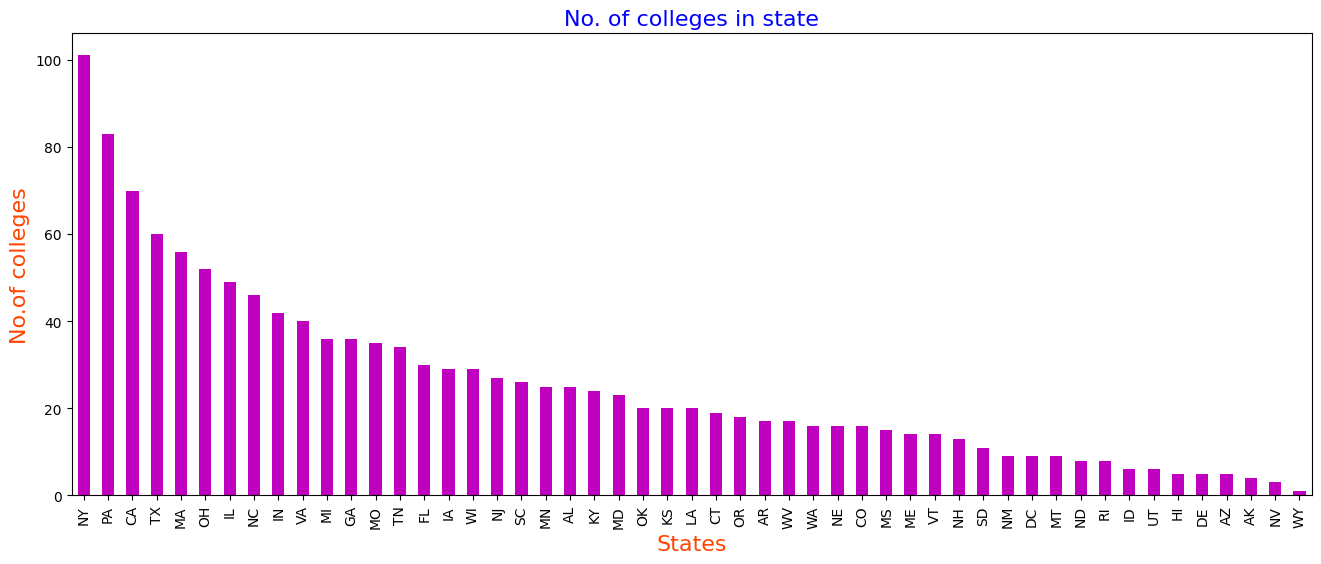

In [ ]:
plt.figure(figsize=(16,6))
usnews["State (postal code)"].value_counts().plot(kind="bar",color="m")
plt.title("No. of colleges in state",size=16,color="b")
plt.xlabel("States",size=16,color="#FF4500")
plt.ylabel("No.of colleges",size=16,color="#FF4500")
plt.show()

In [ ]:
print("Newyork state has higher education focus")

Newyork state has higher education focus


**If a college is chosen at random, what is the probability that it is a private(or public)?**

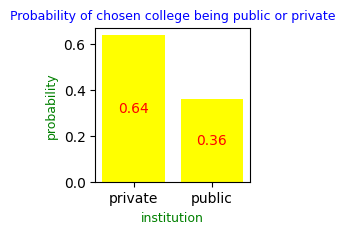

Probability that chosen college is private : 0.64
Probability that chosen college is public : 0.36


In [ ]:
private=usnews[usnews["Public/private indicator (public=1, private=2)"]==2]
prob_private=len(private)/len(usnews)

# bar plot of probability that chosen college is public or private
plt.figure(figsize=(2,2))
x=plt.bar(["private","public"],[prob_private,1-prob_private],color="#FFFF00")
plt.bar_label(x,labels=[round(prob_private,2),round(1-prob_private,2)],label_type="center",color="r")
plt.title("Probability of chosen college being public or private",size=9,color="b")
plt.xlabel("institution",size=9,color="g")
plt.ylabel("probability",size=9,color="green")
plt.show()

print("Probability that chosen college is private :",round(prob_private,2))
print("Probability that chosen college is public :",round(1-prob_private,2))

**What is the probability that randomly chosen college has graduation rate greater than 90%?**

In [ ]:
usnews=usnews.drop(usnews[usnews["Graduation rate"]=="*"].index)
usnews=usnews.astype({'Graduation rate':'int'})
grad_gt_90=usnews[usnews["Graduation rate"]>90]
prob_grad_gt_90=len(grad_gt_90)/len(usnews)

print("Probability that randomly chosen college has graduation rate greater than 90% is",round(prob_grad_gt_90,2))

Probability that randomly chosen college has graduation rate greater than 90% is 0.07


**Undergraduate Enrollment / Graduation rate**

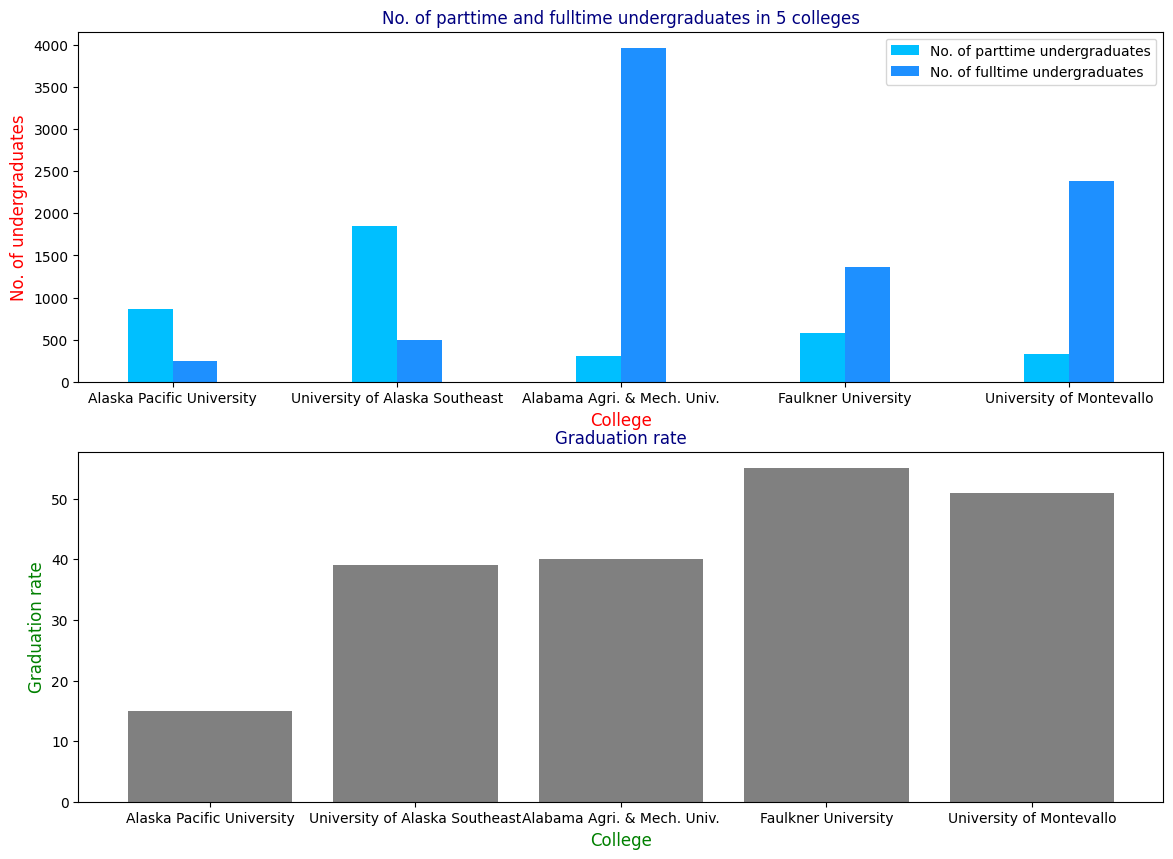

In [ ]:
usnews=usnews.drop(usnews[usnews["Graduation rate"]=="*"].index)
y1=usnews["Graduation rate"].head(5)
y2=usnews["Number of fulltime undergraduates"].head(5)
y3=usnews["Number of parttime undergraduates"].head(5)
x=usnews["College name"].head(5)
y2=y2.astype({'Number of fulltime undergraduates':'int'})
y3=y3.astype({'Number of parttime undergraduates':'int'})
y1=y1.astype({'Graduation rate':'int'})
x_ax=np.arange(len(x))
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.bar(x_ax,y3,0.2,label="No. of parttime undergraduates",color="#00BFFF")
plt.bar(x_ax+0.2,y2,0.2,label="No. of fulltime undergraduates",color="#1E90FF")
plt.title("No. of parttime and fulltime undergraduates in 5 colleges",size=12,color="#000080")
plt.xlabel("College",size=12,color="r")
plt.ylabel("No. of undergraduates",size=12,color="r")
plt.xticks(x_ax+0.1,["Alaska Pacific University","University of Alaska Southeast","Alabama Agri. & Mech. Univ.","Faulkner University","University of Montevallo"])
plt.legend()

plt.subplot(2,1,2)
plt.bar(x,y1,color="#808080")
plt.title("Graduation rate",size=12,color="#000080")
plt.xlabel("College",size=12,color="g")
plt.ylabel("Graduation rate",size=12,color="g")
plt.show()

**Distribution of Student-Faculty Ratio by College Type**

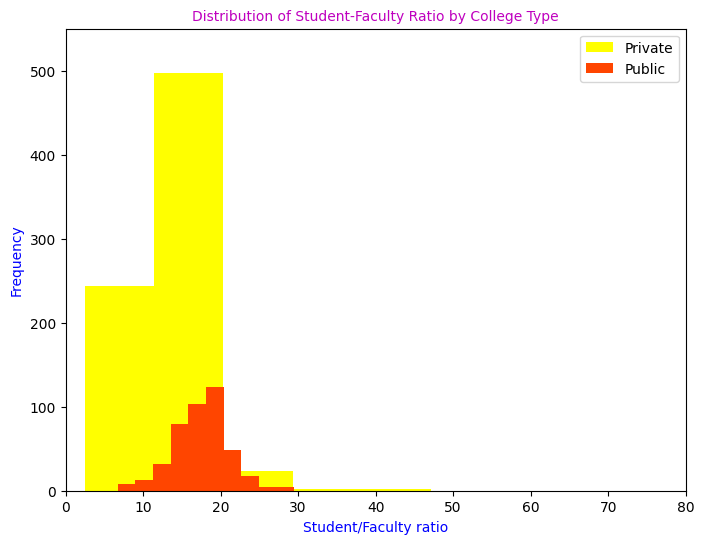

In [ ]:
private_sf = usnews[usnews['Public/private indicator (public=1, private=2)'] == 2]['Student/faculty ratio']
public_sf = usnews[usnews['Public/private indicator (public=1, private=2)'] == 1]['Student/faculty ratio']

plt.figure(figsize=(8,6))
plt.hist(private_sf,label="Private",color="#FFFF00")
plt.hist(public_sf,label="Public",color="#FF4500")
plt.title("Distribution of Student-Faculty Ratio by College Type",color="m",size=10)
plt.xlabel("Student/Faculty ratio",color="b",size=10)
plt.ylabel("Frequency",color="b",size=10)
plt.ylim(0,550)
plt.xlim(0,80)
plt.legend()
plt.show()

**AAUP**

**Is there a significant difference in the average salaries of faculty members in different academic ranks (e.g. assistant professor, associate professor, full professor) in Alaska?**

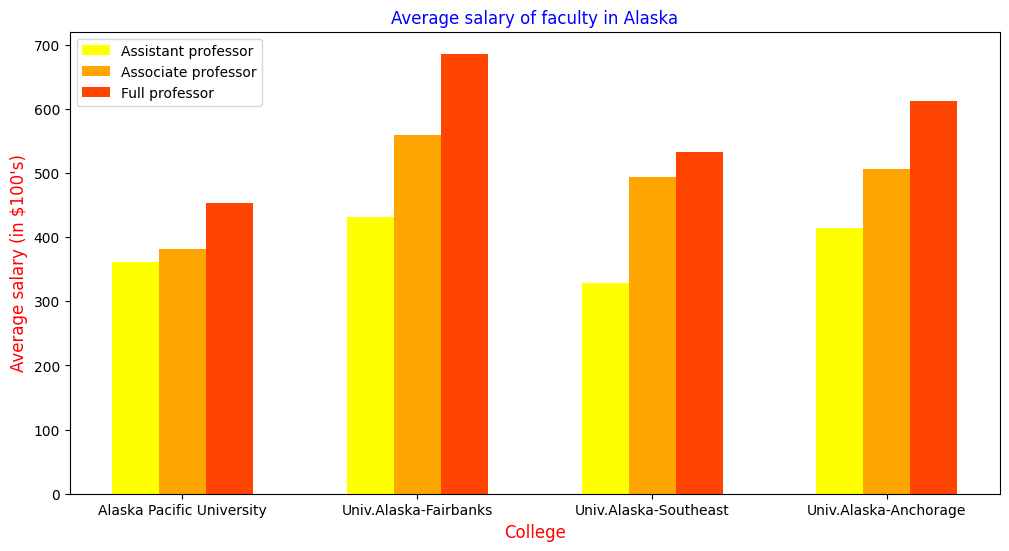

In [ ]:
alaska=aaup[aaup["State (postal code)"]=="AK"]
y1=alaska["Average salary - full professors"]
y2=alaska["Average salary - associate professors"]
y3=alaska["Average salary - assistant professors"]
x=alaska["College name"]
y2=y2.astype({'Average salary - associate professors':'int'})
y3=y3.astype({'Average salary - assistant professors':'int'})
y1=y1.astype({'Average salary - full professors':'int'})
x_ax=np.arange(len(x))
plt.figure(figsize=(12,6))
plt.bar(x_ax,y3,0.2,label="Assistant professor",color="#FFFF00")
plt.bar(x_ax+0.2,y2,0.2,label="Associate professor",color="#FFA500")
plt.bar(x_ax+0.4,y1,0.2,label="Full professor",color="#FF4500")
plt.title("Average salary of faculty in Alaska",color="b")
plt.xlabel("College",size=12,color="r")
plt.ylabel("Average salary (in $100's)",size=12,color="r")
plt.xticks(x_ax+0.2,["Alaska Pacific University","Univ.Alaska-Fairbanks","Univ.Alaska-Southeast","Univ.Alaska-Anchorage"])
plt.ylim(bottom=0)
plt.legend()
plt.show()

**How does the average salary for full professors vary across different types of institutions(I,IIA,IIB)?**

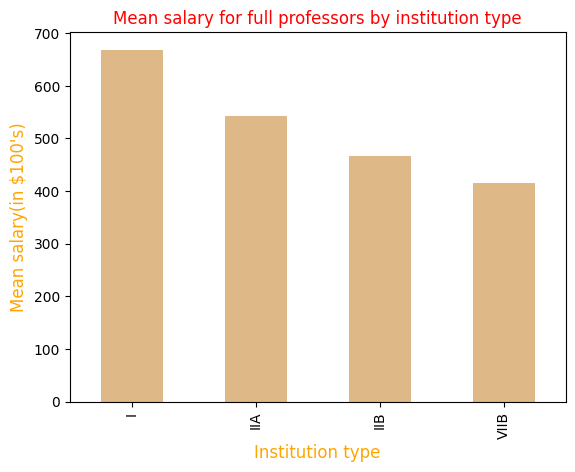

In [ ]:
aaup=aaup.drop(aaup[aaup["Average salary - full professors"]=="*"].index)
aaup=aaup.astype({"Average salary - full professors":"int"})
mean_salary=aaup.groupby("Type (I, IIA, or IIB)")["Average salary - full professors"].mean()
mean_salary.plot(kind="bar",color="#DEB887")
plt.title("Mean salary for full professors by institution type",color="r")
plt.xlabel("Institution type",color="orange",size=12)
plt.ylabel("Mean salary(in $100's)",color="orange",size=12)
plt.show()

**What are the top 10 colleges who are having maximum no. of instructors?**

In [ ]:
x=pd.read_excel("/content/aaup.xlsx",usecols=["College name","Number of instructors"])
x=x.sort_values(by="Number of instructors",ascending=False)
print(x.head(10))

                      College name  Number of instructors
356   Louisiana St.Univ.and A&M C.                    178
921   Penn State Univ.-Main Campus                    160
270          Ball State University                    155
430    Univ.of Maryland-Coll. Park                    133
215         Idaho State University                    120
250   Northern Illinois University                    112
135              Howard University                    111
172    Georgia Southern University                    109
1004  Univ. of Texas-Pan Amer.Univ                    109
183       Univ. of Hawaii at Manoa                    100


**How does the no. of full,associate,assistant professors vary across different types of institutions(I,IIA,IIB)?**

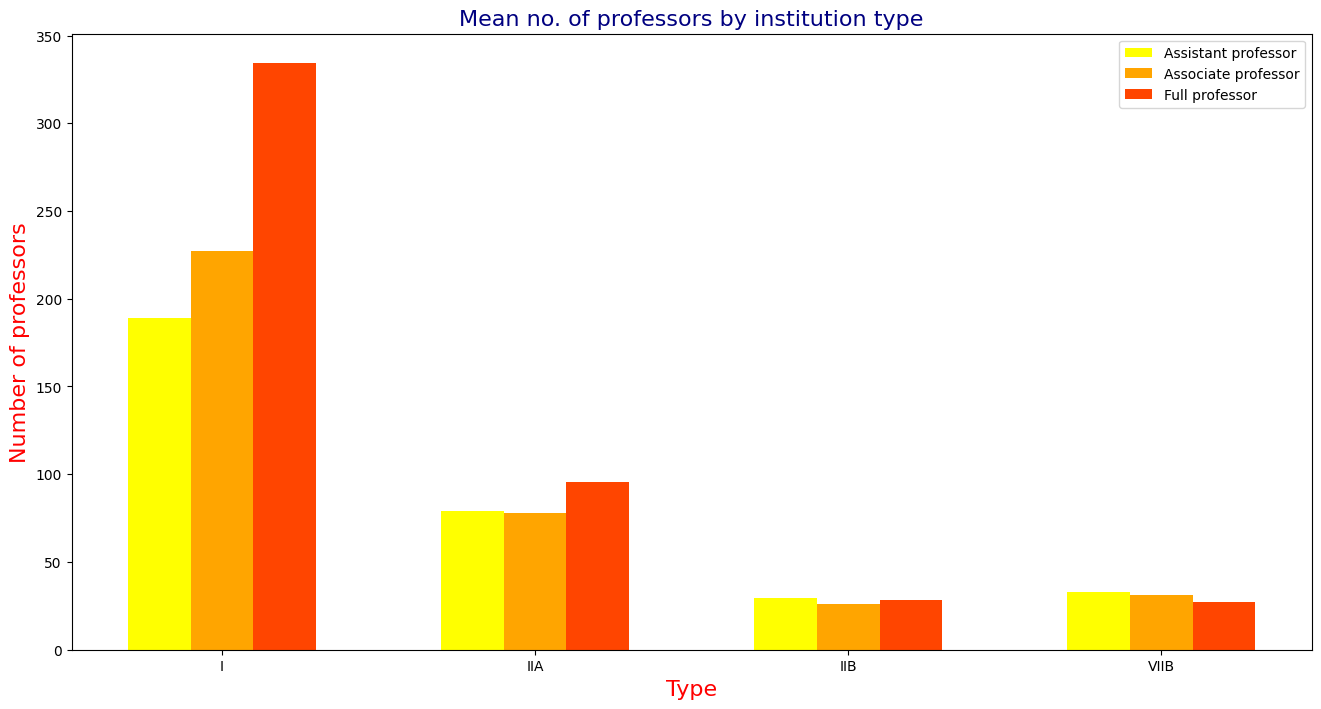

In [ ]:
aaup=aaup.astype({"Number of full professors":"int"})
aaup=aaup.astype({"Number of associate professors":"int"})
aaup=aaup.astype({"Number of assistant professors":"int"})
mean_fullp=aaup.groupby("Type (I, IIA, or IIB)")["Number of full professors"].mean()
mean_assocp=aaup.groupby("Type (I, IIA, or IIB)")["Number of associate professors"].mean()
mean_assisp=aaup.groupby("Type (I, IIA, or IIB)")["Number of assistant professors"].mean()

x_ax=np.arange(4)
plt.figure(figsize=(16,8))
plt.bar(x_ax,mean_assisp,0.2,label="Assistant professor",color="#FFFF00")
plt.bar(x_ax+0.2,mean_assocp,0.2,label="Associate professor",color="#FFA500")
plt.bar(x_ax+0.4,mean_fullp,0.2,label="Full professor",color="#FF4500")
plt.title("Mean no. of professors by institution type",size=16,color="#000080")
plt.xlabel("Type",size=16,color="r")
plt.ylabel("Number of professors",size=16,color="r")
plt.xticks(x_ax+0.2,["I","IIA","IIB","VIIB"])
plt.legend()
plt.show()

**Show the distribution of type I colleges in states of US using pie graph**

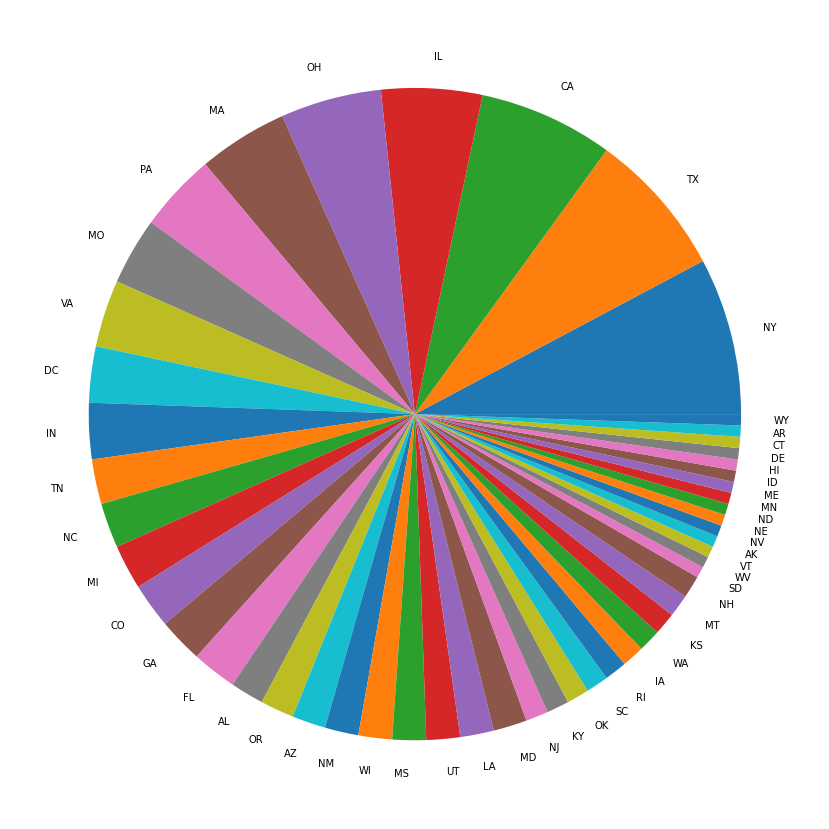

In [ ]:
z=pd.read_excel("/content/aaup.xlsx",usecols=["State (postal code)","Type (I, IIA, or IIB)"])
z=z[z["Type (I, IIA, or IIB)"]=="I"]
z=z["State (postal code)"].value_counts()
x=["NY","TX","CA","IL","OH","MA","PA","MO","VA","DC","IN","TN","NC","MI","CO","GA","FL","AL",
   "OR","AZ","NM","WI","MS","UT","LA","MD","NJ","KY","OK","SC","RI","IA","WA","KS","MT","NH",
   "SD","WV","VT","AK","NV","NE","ND","MN","ME","ID","HI","DE","CT","AR","WY"]

#Plotting pie graph
plt.figure(figsize=(25,15))
plt.pie(z,labels=x)
plt.show()